## What is this notebook about ?

In this notebook, we will discussing how to use PCA

### Tasks to perform:
In this regard, the following are the excercises that will be performed -
* Take a toy problem to understand the basic concepts of PCA
* Take our understanding of PCA to use in a real dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Toy problem

We are taking a 2D data. The following are the features of this dataset -
* This dataset is essentially a gaussian cloud of data points.
* The centre of the data is at : $\hspace{2mm}$ $(x_{c},y_{c}) = (2,1)$
* We have a 2D vector and it can be stacked up in horizontal or vertical direction. As a result will have 10000 of such 2D vectors

#### How to create the dataset -
* First we will take a gaussian dataset with zero mean ($\mu = 0$) and a fixed standard deviation ($\sigma$). Thus these data points will look like a sphere
* Then we will stretch and squeze out the cloud of data points in the horizontal and vertical direction
* Then we will rotate this data set so that the pricipal variation of data is not along a trivial direction

#### The outcome
* We will perform the PCA analysis
* The aim would be recover these two principal directions of maximum variations in the data points

### Cooking up the data

In [2]:
xc = np.array([2,1])      # centre of the data
s = np.array([2,0.5])     # Stretching vector denoting the principal axes of the data

theta = np.pi/3           # rotation of the cloud of data points

# defining the rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),np.cos(theta)]])

n_points = 10000    # no of experiments

# Creating the data matrix
d = np.random.randn(2,n_points)     # creating a random matrix, nRow = 2, nCol=10000
d = np.diag(s) @ d                 # stretching by unit '2' and squezing by unit '0.5'
d = R @ d                          # rotation of the matrix by R matrix

# At this point, the centre of the randomly generated matrix is at (0,0)
# We will now shift the origin of the dataset to xc = (2,1)
d = d + np.diag(xc) @ np.ones((2,n_points))

# d = R @ np.diag(s) @ np.random.randn(2,n_points) + np.diag(xc) @ np.ones((2,n_points))
data_matrix = d

### Visualizing the cooked up data

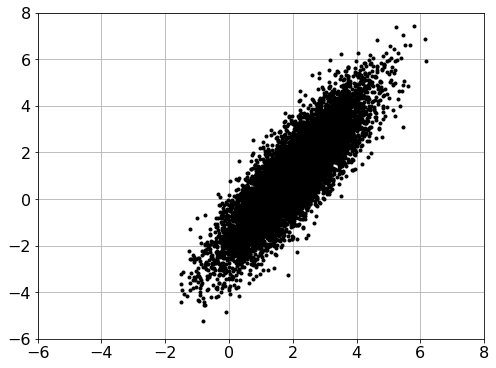

In [3]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
plt.subplots_adjust()

ax.plot(data_matrix[0,:],data_matrix[1,:],marker='.',color='black',linestyle='')
ax.set_xlim((-6,8))
ax.set_ylim((-6,8))
ax.grid()
ax.tick_params('both',labelsize=16)
plt.show()

## Computing the PCA

#### Step 1 : Computing the mean substracted matrix

In [4]:
# Computing the mean of the data matrix
# In this example, we have a matrix with nRow=2 and nCol=10,000
# To compute the mean, we have to go along each row --  which is axis=1
x = data_matrix
x_mean = np.mean(x,axis=1)  # row wise mean value

# Creating the mean matrix
# the mean vector has to be repeated n_points times and along axis = 1
x_mean_mat = np.tile(x_mean,(n_points,1)).T
B = x-x_mean_mat

#### Step 2: Computing the SVD

In [27]:
U,S,VT = np.linalg.svd(B/np.sqrt(n_points),full_matrices=False)

#### Visualizing the data after SVD

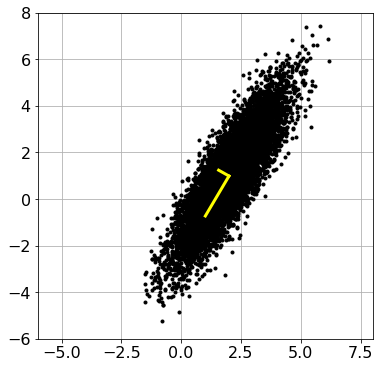

In [36]:
fig1,ax1 = plt.subplots(1,1,figsize=(6,6))
plt.subplots_adjust()

ax1.plot(x[0,:],x[1,:],marker='.',color='black',linestyle='')
ax1.tick_params('both',labelsize=16)
ax1.set_xlim(-6,8)
ax1.set_ylim(-6,8)

# plotting the principal component directions
ax1.plot(np.array([x_mean[0], x_mean[0]+U[0,0]*S[0]]),
         np.array([x_mean[1], x_mean[1]+U[1,0]*S[0]]),'-',color='yellow',linewidth=3)
ax1.plot(np.array([x_mean[0], x_mean[0]+U[0,1]*S[1]]),
         np.array([x_mean[1], x_mean[1]+U[1,1]*S[1]]),'-',color='yellow',linewidth=3)
ax1.grid()
plt.show()